# Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_predict

# Missing Values

In [47]:
training_dataset_path = 'glitch_trn_data.csv'
training_data = pd.read_csv(training_dataset_path)
test_dataset_path = 'glitch_tst_data.csv'
test_data = pd.read_csv(test_dataset_path)


missing_values_training = training_data.isnull().sum()
missing_values_test = test_data.isnull().sum()


print("Training Dataset:")
print("Dimensions:", training_data.shape)
print("Missing Values:")
print(missing_values_training)
print("The dataset has no missing values" if missing_values_training.sum() == 0 else "")
print("\nTest Dataset:")
print("Dimensions:", test_data.shape)
print("Missing Values:")
print(missing_values_test)
print("The dataset has no missing values" if missing_values_test.sum() == 0 else "")


Training Dataset:
Dimensions: (6000, 8)
Missing Values:
id             0
GPStime        0
centralFreq    0
peakFreq       0
snr            0
ifo            0
bandwidth      0
duration       0
dtype: int64
The dataset has no missing values

Test Dataset:
Dimensions: (667, 8)
Missing Values:
id             0
GPStime        0
centralFreq    0
peakFreq       0
snr            0
ifo            0
bandwidth      0
duration       0
dtype: int64
The dataset has no missing values


Column Names: Index(['id', 'GPStime', 'centralFreq', 'peakFreq', 'snr', 'ifo', 'bandwidth',
       'duration', 'class'],
      dtype='object')


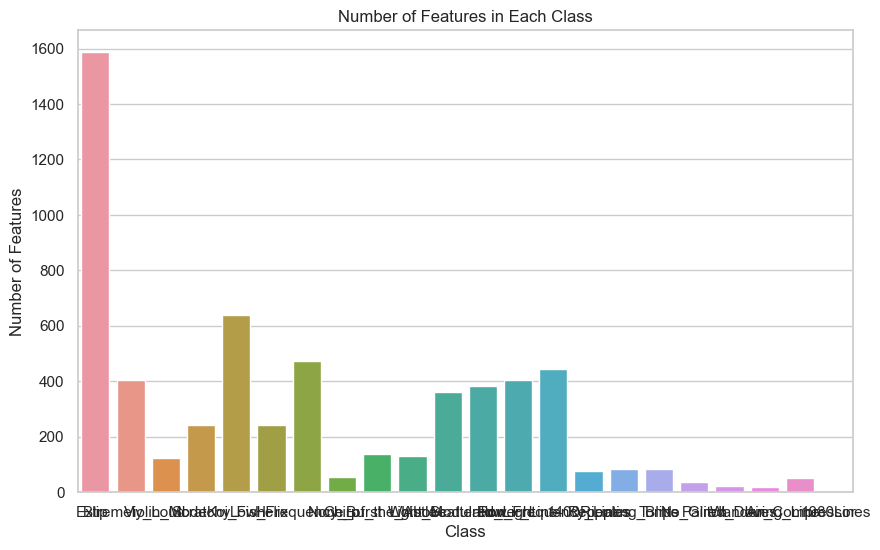

In [20]:
training_dataset_path = 'glitch_trn_data.csv'
training_labels_path = 'glitch_trn_class_labels.csv'

training_data = pd.read_csv(training_dataset_path)
training_labels = pd.read_csv(training_labels_path, header=None, names=['class'])  # Specify the header


merged_data = pd.concat([training_data, training_labels], axis=1)


print("Column Names:", merged_data.columns)


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=merged_data)
plt.title('Number of Features in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Features')
plt.show()


In [21]:
num_instances, num_features = X.shape
num_classes = len(y.unique())

print(f"\nDataset Information:")
print(f"Number of Instances: {num_instances}")
print(f"Number of Features: {num_features}")
print(f"Number of Classes: {num_classes}")



Dataset Information:
Number of Instances: 6000
Number of Features: 6
Number of Classes: 22


In [22]:
feature_data = pd.read_csv('glitch_trn_data.csv')

num_rows, num_columns = feature_data.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 6000
Number of Columns: 8


# Data Visualization

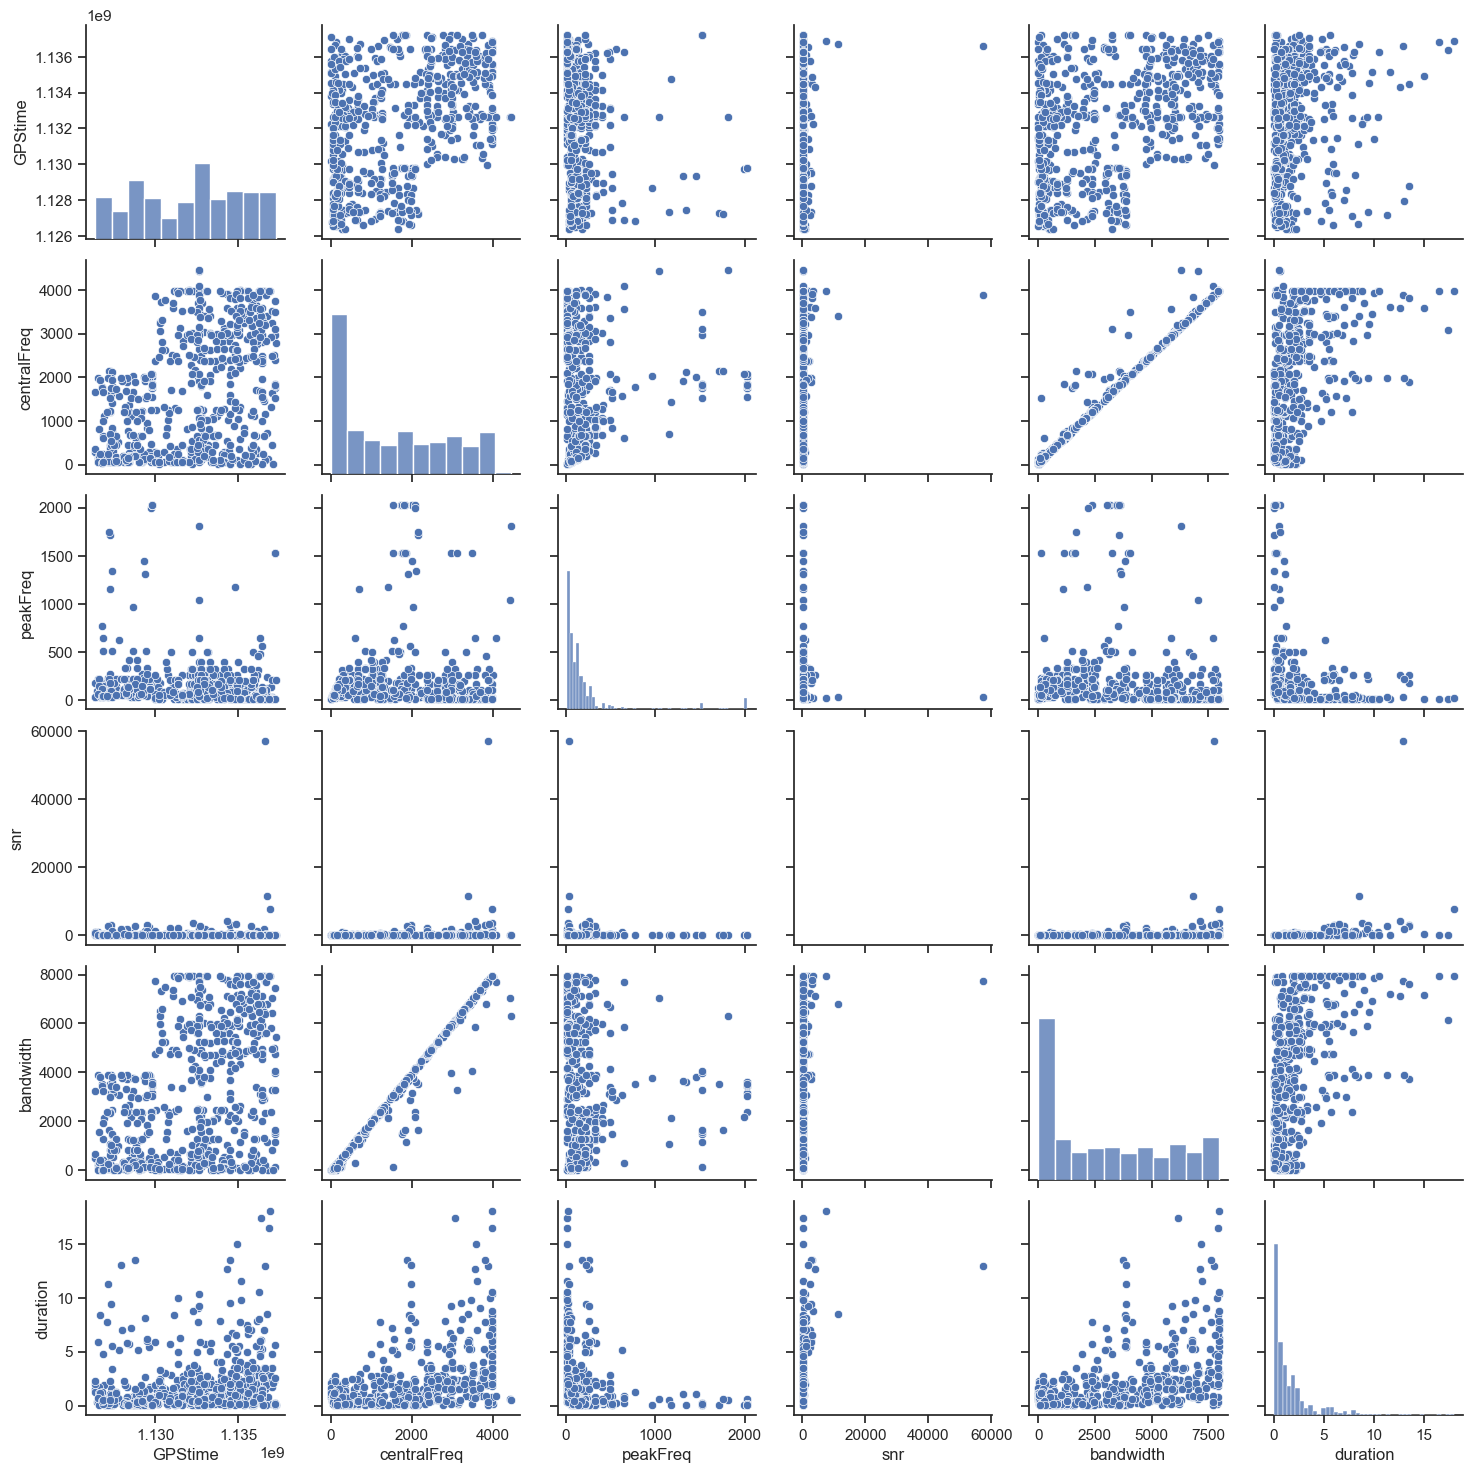

In [23]:
sns.set(style="ticks")
sns.pairplot(test_data)
plt.show()

# One Hot Encoding

In [48]:
test_data = pd.read_csv('glitch_tst_data.csv')
training_data = pd.read_csv('glitch_trn_data.csv')
training_targets = pd.read_csv('glitch_trn_class_labels.csv', header=None, names=['Target'])

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)


training_data_encoded = pd.DataFrame(encoder.fit_transform(training_data),
                                      columns=encoder.get_feature_names_out(training_data.columns))


test_data_encoded = pd.DataFrame(encoder.transform(test_data),
                                  columns=encoder.get_feature_names_out(training_data.columns))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# K Neighbourhood Classifier (Tuned with Grid Search)

In [49]:
feature_data = pd.read_csv('glitch_trn_data.csv')
labels_data = pd.read_csv('glitch_trn_class_labels.csv', header=None, names=['class'])


selected_features = ['centralFreq', 'peakFreq', 'snr', 'GPStime', 'bandwidth', 'duration']
X = feature_data[selected_features]
y = labels_data['class']


categorical_features = X.select_dtypes(include=['object']).columns


knn_model = Pipeline([
    ('encoder', ColumnTransformer(
        transformers=[
            ('num', 'passthrough', X.columns.difference(categorical_features)),
            ('cat', OneHotEncoder(drop='first'), categorical_features)
        ])),
    ('classifier', KNeighborsClassifier())
])


n_splits = 4
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


param_grid = {'classifier__n_neighbors': [3, 5, 7, 9, 11]}


grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X, y)


best_knn_model = grid_search.best_estimator_


y_pred = cross_val_predict(best_knn_model, X, y, cv=stratified_kfold)


accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print(f"Best n_neighbors: {grid_search.best_params_['classifier__n_neighbors']}")
print(f"Accuracy for KNN (Stratified {n_splits}-fold): {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Best n_neighbors: 7
Accuracy for KNN (Stratified 4-fold): 0.46

Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    3    1    0]
 [   0   74    0    0    0    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0   22   15    0    5    0    3    3    0    0    2    0    0
     0    0    1    0    0    0    0    0]
 [   0    8   20 1028   15   37    7  123   68   71   39    2    5    1
    56    5   45   42    0    0    0   15]
 [   0    0    0    8   46    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    1    8  164    3   52    5   44   28   19   20    0    2    2
    13    0   20   12    1    2    0    7]
 [   0    0    0    0    0    0  240    0    2    0    0    0    0    0
     1    0    0    0    0    0    0    0]
 [   0    0   12  380    5   24    4   65   14   43   20    2    1    2
    24    0   19   13    0    2    0    8

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression (Tuned with Grid Search)

In [50]:
feature_data = pd.read_csv('glitch_trn_data.csv')
labels_data = pd.read_csv('glitch_trn_class_labels.csv', header=None, names=['class'])

selected_features = ['centralFreq', 'peakFreq', 'snr', 'GPStime', 'bandwidth', 'duration']
X = feature_data[selected_features]
y = labels_data['class']


categorical_features = X.select_dtypes(include=['object']).columns


logistic_regression_model = Pipeline([
    ('encoder', ColumnTransformer(
        transformers=[
            ('num', 'passthrough', X.columns.difference(categorical_features)),
            ('cat', OneHotEncoder(drop='first'), categorical_features)
        ])),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


n_splits = 4
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


y_pred = cross_val_predict(logistic_regression_model, X, y, cv=stratified_kfold)


accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print(f"Accuracy for Logistic Regression (Stratified {n_splits}-fold): {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy for Logistic Regression (Stratified 4-fold): 0.26

Confusion Matrix:
[[   0    0    0    4    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   75    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   51    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1587    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   54    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0  403    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0  243    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0  638    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM (Tuned with Grid Search)

In [39]:
feature_data = pd.read_csv('glitch_trn_data.csv')
labels_data = pd.read_csv('glitch_trn_class_labels.csv', header=None, names=['class'])

selected_features = ['centralFreq', 'peakFreq', 'snr', 'GPStime', 'bandwidth', 'duration']
X = feature_data[selected_features]
y = labels_data['class']


categorical_features = X.select_dtypes(include=['object']).columns


svm_model = Pipeline([
    ('encoder', ColumnTransformer(
        transformers=[
            ('num', 'passthrough', X.columns.difference(categorical_features)),
            ('cat', OneHotEncoder(drop='first'), categorical_features)
        ])),
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear', random_state=42))
])


param_grid = {'classifier__C': [0.1, 1, 10, 100]}


n_splits = 4
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X, y)


best_svm_model = grid_search.best_estimator_


y_pred = cross_val_predict(best_svm_model, X, y, cv=stratified_kfold)


accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print(f"Accuracy for Linear Kernel SVM (Stratified {n_splits}-fold): {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy for Linear Kernel SVM (Stratified 4-fold): 0.76

Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    3    1    0]
 [   0   73    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    2]
 [   0    0   48    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    3    0    0    0]
 [   0    0    9 1530    0    2    3    8   19    0    0    0    0    2
     5    0    0    0    6    0    0    3]
 [   0    0    0   54    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    4    0  340    1   34    0   15    0    0    0    0
     1    0    7    0    0    1    0    0]
 [   0    0    0   86    0    1  154    0    0    0    0    0    0    0
     0    0    0    2    0    0    0    0]
 [   0    0    0   45    0    9    0  549   16    6    0    0    0    0
     3    0    9    0    1    0    0    0]
 [  

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ada Boost Classification (Tuned with Grid Search)

In [51]:
feature_data = pd.read_csv('glitch_trn_data.csv')
labels_data = pd.read_csv('glitch_trn_class_labels.csv', header=None, names=['class'])


selected_features = ['centralFreq', 'peakFreq', 'snr', 'GPStime', 'bandwidth', 'duration']
X = feature_data[selected_features]
y = labels_data['class']


categorical_features = X.select_dtypes(include=['object']).columns


model = Pipeline([
    ('encoder', ColumnTransformer(
        transformers=[
            ('num', 'passthrough', X.columns.difference(categorical_features)),
            ('cat', OneHotEncoder(drop='first'), categorical_features)
        ])),
    ('classifier', AdaBoostClassifier(n_estimators=50, random_state=42))
])


param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 1.0]
}


stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X, y)


best_model = grid_search.best_estimator_


y_pred = cross_val_predict(best_model, X, y, cv=stratified_kfold)


accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print(f"Best Parameters from Grid Search: {grid_search.best_params_}")
print(f"Accuracy for AdaBoost (Stratified k-fold): {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Best Parameters from Grid Search: {'classifier__learning_rate': 1.0, 'classifier__n_estimators': 50}
Accuracy for AdaBoost (Stratified k-fold): 0.51

Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    1    0    3]
 [   0   19    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0   19    0   37]
 [   0    0    1    0    0    7   23    0    0    0    0    0    0    0
     2    0    0    0   18    0    0    0]
 [   0    0    0 1385    0   23   17  127    0    0    0    0    0    0
     2    0    0   13   11    0    0    9]
 [   0    0    0   45    0    0    0    7    0    0    0    0    0    0
     0    0    0    2    0    0    0    0]
 [   0    0    0    3    0  194    0  161    0   10    2    0    0    0
     0    0   27    0    0    2    0    4]
 [   0    0    0  240    0    1    0    2    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   12    0 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gaussian Naive Bayes 

In [41]:
feature_data = pd.read_csv('glitch_trn_data.csv')
labels_data = pd.read_csv('glitch_trn_class_labels.csv', header=None, names=['class'])


selected_features = ['centralFreq', 'peakFreq', 'snr', 'GPStime', 'bandwidth', 'duration']
X = feature_data[selected_features]
y = labels_data['class']


categorical_features = X.select_dtypes(include=['object']).columns


bayesian_nb_model = Pipeline([
    ('encoder', ColumnTransformer(
        transformers=[
            ('num', 'passthrough', X.columns.difference(categorical_features)),
            ('cat', OneHotEncoder(drop='first'), categorical_features)
        ])),
    ('classifier', GaussianNB())
])


stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

y_pred_bayesian_nb = cross_val_predict(bayesian_nb_model, X, y, cv=stratified_kfold)

accuracy_bayesian_nb = accuracy_score(y, y_pred_bayesian_nb)
conf_matrix_bayesian_nb = confusion_matrix(y, y_pred_bayesian_nb)
class_report_bayesian_nb = classification_report(y, y_pred_bayesian_nb)

print("Gaussian Naive Bayes Model:")
print(f"Accuracy for Gaussian Naive Bayes (Stratified k-fold): {accuracy_bayesian_nb:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_bayesian_nb)
print("\nClassification Report:")
print(class_report_bayesian_nb)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gaussian Naive Bayes Model:
Accuracy for Gaussian Naive Bayes (Stratified k-fold): 0.42

Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    3    0    1]
 [   0   69    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    6]
 [   0    0   34    5    5    0    0    0    0    0    1    0    0    0
     5    0    1    0    0    0    0    0]
 [   0    0   13 1155  166    1   56   49    0    5   90    0    0    0
     7    0   25    0    0    0    7   13]
 [   0    0    0    6   22    0   26    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    3   33    3  264    2   43    3   28   14    0    2    0
     5    0    2    0    0    1    0    0]
 [   0    0    0   12    1    0  229    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    5  278   34    2   24  112    1   55  102    0    1    0
     3    0   15

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier (Tuned with Grid Search)

In [42]:
feature_data = pd.read_csv('glitch_trn_data.csv')
labels_data = pd.read_csv('glitch_trn_class_labels.csv', header=None, names=['class'])


print("Column Names in labels_data:", labels_data.columns)


selected_features = ['centralFreq', 'peakFreq', 'snr', 'GPStime', 'bandwidth', 'duration']


X = feature_data[selected_features]
y = labels_data['class']


categorical_columns = X.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    print("Performing One-Hot Encoding...")
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
    X = pd.concat([X.drop(columns=categorical_columns), X_encoded], axis=1)


model = RandomForestClassifier(n_estimators=200, random_state=60)
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


y_pred = cross_val_predict(model, X, y, cv=stratified_kfold)


accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print(f"Accuracy for Random Forest (Stratified k-fold): {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


param_grid = {
    'ccp_alpha': [0.0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05]
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, random_state=60),
                           param_grid=param_grid,
                           cv=stratified_kfold,
                           scoring='accuracy')

grid_search.fit(X, y)
best_model = grid_search.best_estimator_

print(f"\nBest CCP Alpha: {grid_search.best_params_['ccp_alpha']}")
print(f"Best Accuracy: {grid_search.best_score_}")


y_pred_pruned = cross_val_predict(best_model, X, y, cv=stratified_kfold)


accuracy_pruned = accuracy_score(y, y_pred_pruned)
conf_matrix_pruned = confusion_matrix(y, y_pred_pruned)
class_report_pruned = classification_report(y, y_pred_pruned)

print(f"\nAccuracy for Pruned Random Forest (Stratified k-fold): {accuracy_pruned:.2f}")
print("\nConfusion Matrix for Pruned Model:")
print(conf_matrix_pruned)
print("\nClassification Report for Pruned Model:")
print(class_report_pruned)


Column Names in labels_data: Index(['class'], dtype='object')


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for Random Forest (Stratified k-fold): 0.87

Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    3    1    0]
 [   0   72    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    3]
 [   0    0   46    2    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    3    0    0    0]
 [   0    0    1 1514    3    1    2   15   38    0    0    0    1    0
     0    2    1    2    5    0    0    2]
 [   0    0    0   12   39    0    0    0    3    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  350    2   31    9    3    0    0    4    0
     0    0    1    1    1    1    0    0]
 [   0    0    0    3    2    1  234    0    2    0    0    0    0    0
     0    0    0    1    0    0    0    0]
 [   0    0    0   23    0   11    0  590    5    0    0    1    1    0
     0    2    2    0    3    0    0    0]
 [   0  

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
test_data = pd.read_csv('glitch_tst_data.csv')

X_test = test_data[selected_features]

categorical_columns_test = X_test.select_dtypes(include=['object']).columns
if not categorical_columns_test.empty:
    print("Performing One-Hot Encoding for Test Data...")
    X_encoded_test = pd.DataFrame(encoder.transform(X_test[categorical_columns_test]))
    X_test = pd.concat([X_test.drop(columns=categorical_columns_test), X_encoded_test], axis=1)

y_pred_test = best_model.predict(X_test)

predicted_result = pd.DataFrame({'Predicted_Class': y_pred_test})
print(predicted_result)

      Predicted_Class
0            Koi_Fish
1                Blip
2               Helix
3                Blip
4                Blip
..                ...
662  Light_Modulation
663             Helix
664   Scattered_Light
665       Violin_Mode
666              Blip

[667 rows x 1 columns]


# Generating Class Labels

In [45]:
test_data = pd.read_csv('glitch_tst_data.csv')

predicted_labels = best_model.predict(test_data[selected_features])

predicted_df = pd.DataFrame({'Predicted_Class': predicted_labels})

predicted_df.to_csv('predicted_labels_glitch_21230.csv', index=False)

print("Predicted labels saved to 'predicted_labels_glitch_21230.csv'")

Predicted labels saved to 'predicted_labels_glitch_21230.csv'
